<a href="https://colab.research.google.com/github/rahul261098/Analyze-Fitness-Data-using-Excel/blob/main/CourseProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Weather Prediction Machine learning Model


### Problem

** The problem statement involves predicting rainfall in Sydney using machine learning models. Given the dataset covering weather-related variables from 2008 to 2017, there is an opportunity to leverage machine learning techniques to improve the accuracy of rainfall predictions.The goal is to achieve the best accuracy by comparing the performance of different models.

### My approach to solving this task



(A) Data Preprocessing:-

convert RainToday and RainTomorrow column into dummi variable
Replace Null values with mean of its
check for outliers in this dataset

(B) Model Selcetion:-

Trying various classification models, including Decision Trees and Ensemble methods (Random Forest, Gradient Boosting,kNN ,XGBoost).

(C) Model Training and Evaluation:-

Split the data into test and train datasets.
Train the particular model on the training dataset.
evaluate their performance using metrics like accuracy,recall,F1 and precision.
Select the model with the best performance.

(D)Model Comparison:-

Compare the performance of different models to select the best one

(E)Model Optimization:-

use hyperparameter by gridsearchcv to improve model accuracy



## ML model Used:


*  Decision Trees
*  Logistic Regression
* Random Forest
* Bagging
* Gradient Boosting
* XGBoost
* K-Nearest Neighbors


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv('/content/sydney_rain predictions(Sheet1).csv',header=0)

In [ ]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2/1/2008,Sydney,19.5,22.4,15.6,6.2,0.0,92.0,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,Yes,Yes
1,2/2/2008,Sydney,19.5,25.6,6.0,3.4,2.7,83.0,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,Yes,Yes
2,2/3/2008,Sydney,21.6,24.5,6.6,2.4,0.1,88.0,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,Yes,Yes
3,2/4/2008,Sydney,20.2,22.8,18.8,2.2,0.0,83.0,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,Yes,Yes
4,2/5/2008,Sydney,19.7,25.7,77.4,NaN,0.0,88.0,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,Yes,Yes


In [ ]:
#Dummei Data
df=pd.get_dummies(df,columns=['RainToday','RainTomorrow'],drop_first=True)


In [ ]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday_Yes,RainTomorrow_Yes
0,2/1/2008,Sydney,19.5,22.4,15.6,6.2,0.0,92.0,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,True,True
1,2/2/2008,Sydney,19.5,25.6,6.0,3.4,2.7,83.0,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,True,True
2,2/3/2008,Sydney,21.6,24.5,6.6,2.4,0.1,88.0,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,True,True
3,2/4/2008,Sydney,20.2,22.8,18.8,2.2,0.0,83.0,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,True,True
4,2/5/2008,Sydney,19.7,25.7,77.4,NaN,0.0,88.0,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,True,True


In [ ]:
df["RainToday_Yes"]=df["RainToday_Yes"].astype(int)
df["RainTomorrow_Yes"]=df["RainTomorrow_Yes"].astype(int)


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3337 entries, 0 to 3336
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              3337 non-null   object 
 1   Location          3337 non-null   object 
 2   MinTemp           3334 non-null   float64
 3   MaxTemp           3335 non-null   float64
 4   Rainfall          3331 non-null   float64
 5   Evaporation       3286 non-null   float64
 6   Sunshine          3321 non-null   float64
 7   Humidity9am       3323 non-null   float64
 8   Humidity3pm       3324 non-null   float64
 9   Pressure9am       3317 non-null   float64
 10  Pressure3pm       3318 non-null   float64
 11  Cloud9am          2771 non-null   float64
 12  Cloud3pm          2776 non-null   float64
 13  Temp9am           3333 non-null   float64
 14  Temp3pm           3333 non-null   float64
 15  RainToday_Yes     3337 non-null   int64  
 16  RainTomorrow_Yes  3337 non-null   int64  


In [ ]:
# Select only numeric columns
numeric_cols = df.select_dtypes(include='number').columns

# Replace null values with mean for numeric columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

# Fill null values in "RainToday" with the mode
df['RainToday_Yes'].fillna(df['RainToday_Yes'].mode()[0], inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3337 entries, 0 to 3336
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              3337 non-null   object 
 1   Location          3337 non-null   object 
 2   MinTemp           3337 non-null   float64
 3   MaxTemp           3337 non-null   float64
 4   Rainfall          3337 non-null   float64
 5   Evaporation       3337 non-null   float64
 6   Sunshine          3337 non-null   float64
 7   Humidity9am       3337 non-null   float64
 8   Humidity3pm       3337 non-null   float64
 9   Pressure9am       3337 non-null   float64
 10  Pressure3pm       3337 non-null   float64
 11  Cloud9am          3337 non-null   float64
 12  Cloud3pm          3337 non-null   float64
 13  Temp9am           3337 non-null   float64
 14  Temp3pm           3337 non-null   float64
 15  RainToday_Yes     3337 non-null   int64  
 16  RainTomorrow_Yes  3337 non-null   int64  


In [ ]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday_Yes,RainTomorrow_Yes
count,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000
mean,14.865057,23.002339,3.330231,5.187432,7.179374,68.229010,54.699158,1018.346156,1016.018774,4.181523,4.218660,17.819742,21.533333,0.259515,0.259215
std,4.551593,4.493290,9.886270,2.756095,3.801737,15.053668,16.261752,7.000492,7.012157,2.505491,2.409531,4.894240,4.301156,0.438434,0.438269
min,4.300000,11.700000,0.000000,0.000000,0.000000,19.000000,10.000000,986.700000,989.800000,0.000000,0.000000,6.400000,10.200000,0.000000,0.000000
25%,11.000000,19.600000,0.000000,3.200000,4.300000,58.000000,44.000000,1013.800000,1011.300000,2.000000,2.000000,13.800000,18.400000,0.000000,0.000000
50%,14.900000,22.800000,0.000000,4.800000,8.200000,69.000000,56.000000,1018.500000,1016.300000,4.181523,4.218660,18.200000,21.300000,0.000000,0.000000
75%,18.700000,26.000000,1.400000,7.000000,10.200000,80.000000,64.000000,1023.100000,1020.800000,7.000000,7.000000,21.700000,24.500000,1.000000,1.000000
max,27.600000,45.800000,119.400000,18.400000,13.600000,100.000000,99.000000,1039.000000,1036.700000,9.000000,8.000000,36.500000,44.700000,1.000000,1.000000


## Outliers

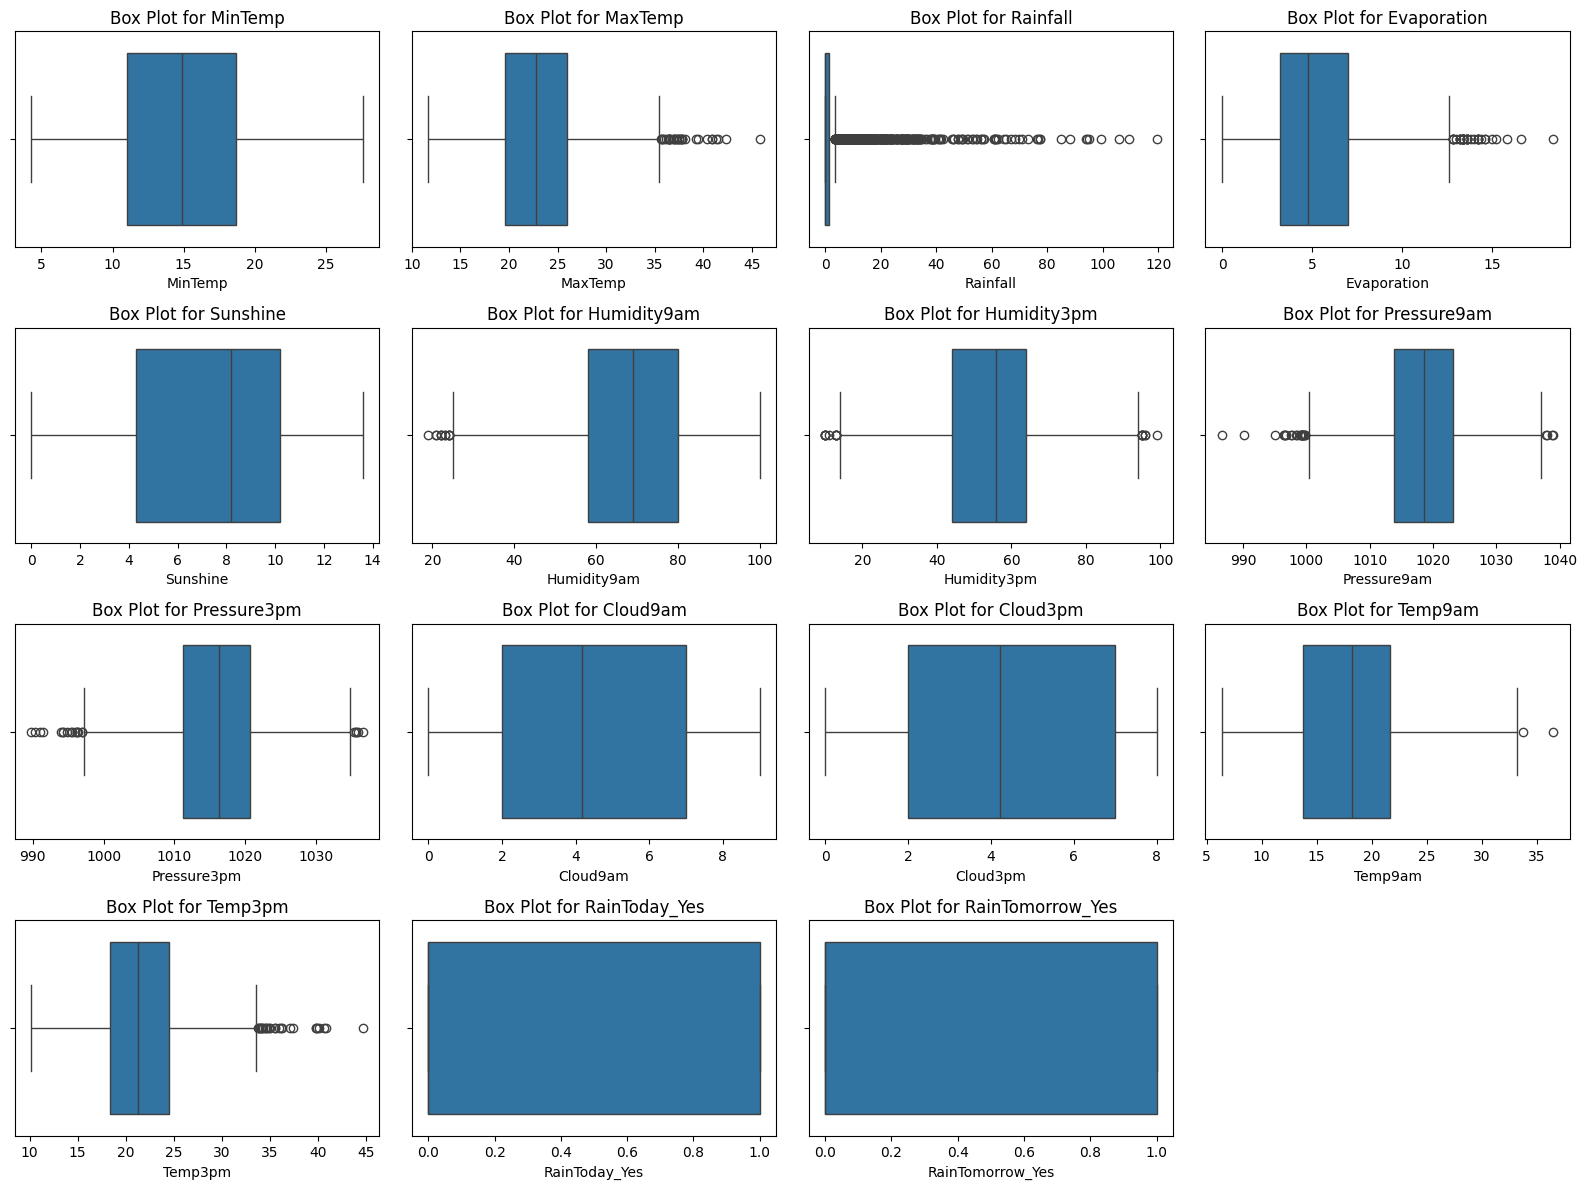

In [ ]:
# Create box plots for each numeric column

plt.figure(figsize=(16, 12))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot for {col}')

plt.tight_layout()
plt.show()

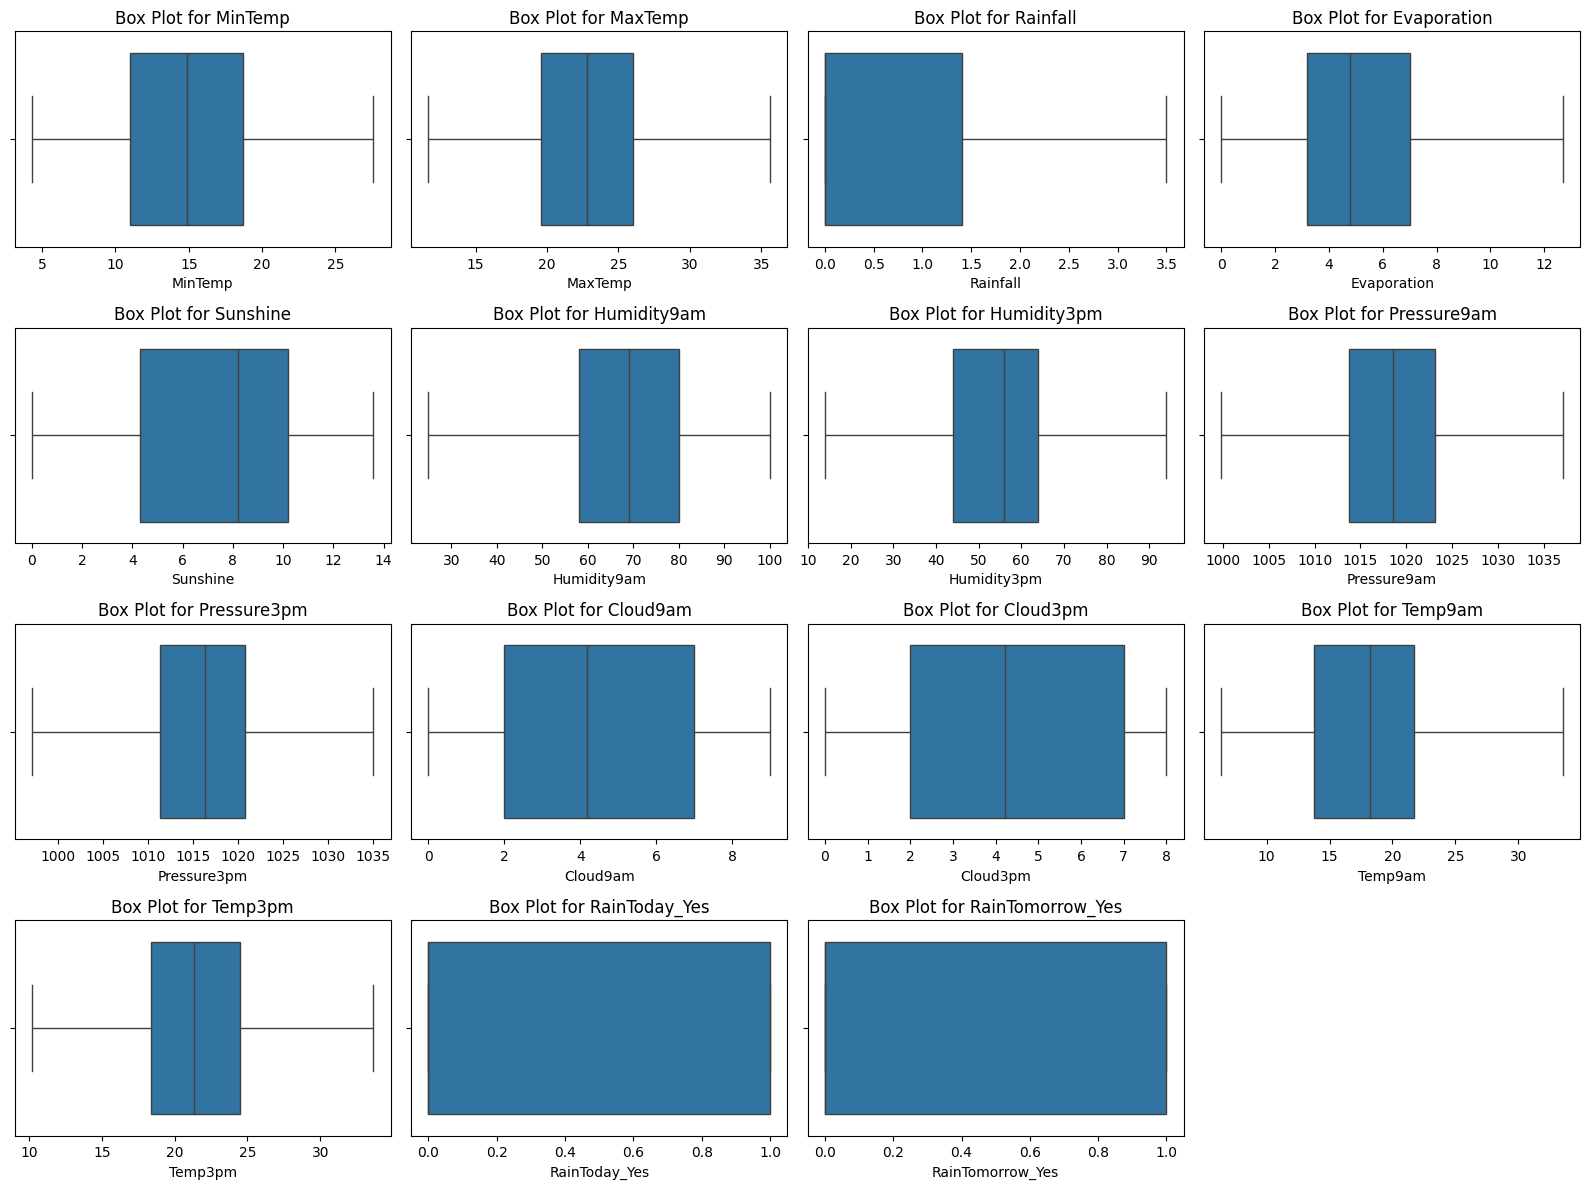

In [ ]:
# Treating Outlier
#IQR Method

# Include only numeric types
numeric_df = df.select_dtypes(include=np.number)
Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1

Lower_bound = Q1 - 1.5 * IQR
Upper_bound = Q3 + 1.5 * IQR

for col in numeric_df.columns:
  df[col] = np.where(df[col] < Lower_bound[col],Lower_bound[col],df[col])
  df[col] = np.where(df[col] > Upper_bound[col],Upper_bound[col],df[col])

plt.figure(figsize=(16, 12))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot for {col}')

plt.tight_layout()
plt.show()

## Heatmap

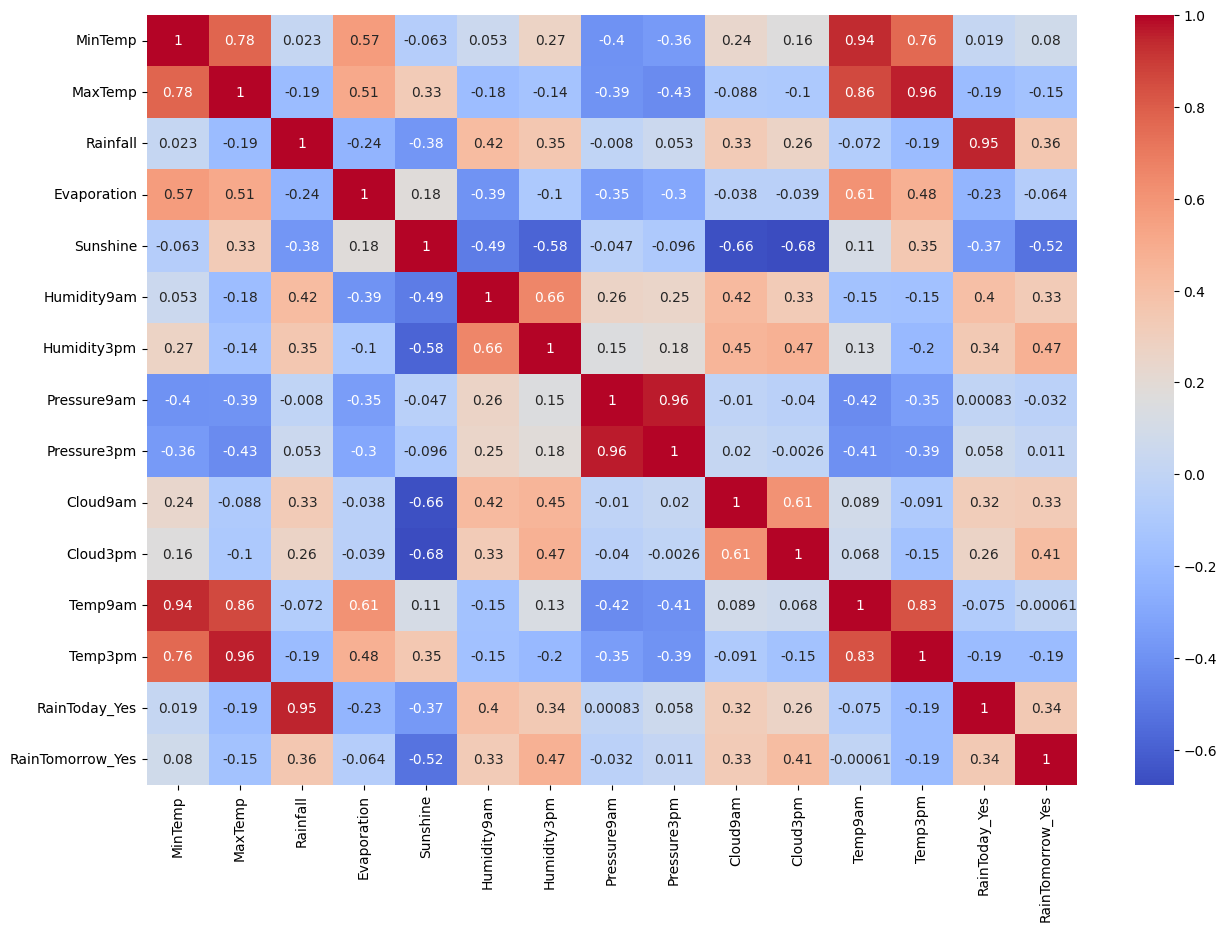

In [ ]:
## selecting only numeriacal column
numeric_df = df.select_dtypes(include=np.number)
corr = numeric_df.corr()

plt.figure(figsize=(15,10)) # Create the figure with the desired figsize
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

## Train Test Split

In [ ]:
# assign the dependent variable and independent variable excluding Date and Location
x=df.drop(['RainTomorrow_Yes','Date','Location'],axis=1)
y=df['RainTomorrow_Yes']

from sklearn.model_selection import train_test_split


# Split the data into training and testing sets
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(2669, 14)
(668, 14)
(2669,)
(668,)


## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,precision_score,recall_score,f1_score

lr=LogisticRegression()
lr.fit(x_train,y_train)


# predicting values
y_test_pred=lr.predict(x_test)
y_train_pred=lr.predict(x_train)

#Print the result
# Print the confusion matrix and accuracy score


print("Test Accuracy: ",accuracy_score(y_test,y_test_pred))
print('Confusion matrix for test data:\n', confusion_matrix(y_test, y_test_pred))

print("Train Accuracy: ",accuracy_score(y_train,y_train_pred))
print('Confusion matrix for train data:\n', confusion_matrix(y_train, y_train_pred))

print(classification_report(y_test,y_test_pred))

print("Precision: ",precision_score(y_test,y_test_pred))
print("Recall: ",recall_score(y_test,y_test_pred))
print("F1: ",f1_score(y_test,y_test_pred))


Test Accuracy:  0.8278443113772455
Confusion matrix for test data:
 [[446  38]
 [ 77 107]]
Train Accuracy:  0.8381416260771825
Confusion matrix for train data:
 [[1850  138]
 [ 294  387]]
              precision    recall  f1-score   support

         0.0       0.85      0.92      0.89       484
         1.0       0.74      0.58      0.65       184

    accuracy                           0.83       668
   macro avg       0.80      0.75      0.77       668
weighted avg       0.82      0.83      0.82       668

Precision:  0.7379310344827587
Recall:  0.5815217391304348
F1:  0.6504559270516718


## Decision Tree Classifier

In [ ]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,precision_score,recall_score,f1_score
from sklearn.model_selection import GridSearchCV

cl_tr=DecisionTreeClassifier()
cl_tr.fit(x_train,y_train)


# predicting Values
y_test_pred=cl_tr.predict(x_test)
y_train_pred=cl_tr.predict(x_train)

#Print the result
# Print the confusion matrix and accuracy score

print("Test Accuracy: ",accuracy_score(y_test,y_test_pred))
print('Confusion matrix for test data:\n', confusion_matrix(y_test, y_test_pred))

print("Train Accuracy: ",accuracy_score(y_train,y_train_pred))
print('Confusion matrix for train data:\n', confusion_matrix(y_train, y_train_pred))

print(classification_report(y_test,y_test_pred))



Test Accuracy:  0.7589820359281437
Confusion matrix for test data:
 [[398  86]
 [ 75 109]]
Train Accuracy:  1.0
Confusion matrix for train data:
 [[1988    0]
 [   0  681]]
              precision    recall  f1-score   support

         0.0       0.84      0.82      0.83       484
         1.0       0.56      0.59      0.58       184

    accuracy                           0.76       668
   macro avg       0.70      0.71      0.70       668
weighted avg       0.76      0.76      0.76       668



### For Improving accuracy GRID SEARCH CV

In [ ]:
from sklearn.model_selection import GridSearchCV

# Perform GridSearchCV
param_grid={'max_depth':np.arange(1,10)}
grid_search=GridSearchCV(cl_tr,param_grid,cv=5)

grid_search.fit(x_train,y_train)

best_params=grid_search.best_params_
best_model=grid_search.best_estimator_

# Predict values using the best model

y_pred_best=best_model.predict(x_test)
y_pred_train_best=best_model.predict(x_train)


#Print the result
print('Best Parameters:',best_params)

# Print the confusion matrix and accuracy score



print('Test Accuracy:',accuracy_score(y_test,y_pred_best))
print('Confusion matrix for test data:\n', confusion_matrix(y_test, y_pred_best))


print('Train Accuracy:',accuracy_score(y_train,y_pred_train_best))
print('Confusion matrix for train data:\n', confusion_matrix(y_train, y_pred_train_best))
print(classification_report(y_test,y_pred_best))

print("Precision: ",precision_score(y_test,y_pred_best))
print("Recall: ",recall_score(y_test,y_pred_best))
print("F1: ",f1_score(y_test,y_pred_best))

Best Parameters: {'max_depth': 4}
Test Accuracy: 0.8068862275449101
Confusion matrix for test data:
 [[442  42]
 [ 87  97]]
Train Accuracy: 0.8433870363431997
Confusion matrix for train data:
 [[1881  107]
 [ 311  370]]
              precision    recall  f1-score   support

         0.0       0.84      0.91      0.87       484
         1.0       0.70      0.53      0.60       184

    accuracy                           0.81       668
   macro avg       0.77      0.72      0.74       668
weighted avg       0.80      0.81      0.80       668

Precision:  0.697841726618705
Recall:  0.5271739130434783
F1:  0.6006191950464397


## Bagging Classifier


In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,precision_score,recall_score,f1_score
from sklearn.model_selection import GridSearchCV


# Create a decision tree classifier as the base estimator
bgg_est = DecisionTreeClassifier()


# performing Grid search
param_grid={'max_depth':np.arange(1,10)}
grid_search=GridSearchCV(bgg_est,param_grid,cv=5)
grid_search.fit(x_train,y_train)


best_params=grid_search.best_params_
best_model=grid_search.best_estimator_

# Predict values

y_pred_best=best_model.predict(x_test)
y_pred_train_best=best_model.predict(x_train)

#Print the result

print('Best Parameters:',best_params)

# Print the confusion matrix and accuracy score

print('Test Accuracy:',accuracy_score(y_test,y_pred_best))
print('Confusion matrix for test data:\n', confusion_matrix(y_test, y_pred_best))



print('Train Accuracy:',accuracy_score(y_train,y_pred_train_best))
print('Confusion matrix for train data:\n', confusion_matrix(y_train, y_pred_train_best))
print(classification_report(y_test,y_pred_best))

print("Precision: ",precision_score(y_test,y_pred_best))
print("Recall: ",recall_score(y_test,y_pred_best))
print("F1: ",f1_score(y_test,y_pred_best))

Best Parameters: {'max_depth': 4}
Test Accuracy: 0.8068862275449101
Confusion matrix for test data:
 [[442  42]
 [ 87  97]]
Train Accuracy: 0.8433870363431997
Confusion matrix for train data:
 [[1881  107]
 [ 311  370]]
              precision    recall  f1-score   support

         0.0       0.84      0.91      0.87       484
         1.0       0.70      0.53      0.60       184

    accuracy                           0.81       668
   macro avg       0.77      0.72      0.74       668
weighted avg       0.80      0.81      0.80       668

Precision:  0.697841726618705
Recall:  0.5271739130434783
F1:  0.6006191950464397


## Random foreast


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_tr=RandomForestClassifier()

param_grid={'max_depth':np.arange(1,10)}
grid_search=GridSearchCV(rf_tr,param_grid,cv=5)
grid_search.fit(x_train,y_train)


# Predict values using the best model
y_test_pred=grid_search.predict(x_test)
y_train_pred=grid_search.predict(x_train)


#Print the result

print('Best Parameters:',grid_search.best_params_)

# Print the confusion matrix and accuracy score
print('Test Accuracy:',accuracy_score(y_test,y_test_pred))
print('Confusion matrix for test data:\n', confusion_matrix(y_test, y_test_pred))


print('Train Accuracy:',accuracy_score(y_train,y_train_pred))
print('Confusion matrix for train data:\n', confusion_matrix(y_train, y_train_pred))
print(classification_report(y_test,y_test_pred))
print("Precision: ",precision_score(y_test,y_test_pred))
print("Recall: ",recall_score(y_test,y_test_pred))
print("F1: ",f1_score(y_test,y_test_pred))

Best Parameters: {'max_depth': 9}
Test Accuracy: 0.8263473053892215
Confusion matrix for test data:
 [[454  30]
 [ 86  98]]
Train Accuracy: 0.9205695016860247
Confusion matrix for train data:
 [[1983    5]
 [ 207  474]]
              precision    recall  f1-score   support

         0.0       0.84      0.94      0.89       484
         1.0       0.77      0.53      0.63       184

    accuracy                           0.83       668
   macro avg       0.80      0.74      0.76       668
weighted avg       0.82      0.83      0.82       668

Precision:  0.765625
Recall:  0.532608695652174
F1:  0.6282051282051282


## KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(x_train)
X_test_scaled=scaler.transform(x_test)

knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled,y_train)

# Predict values
y_pred_knn=knn.predict(X_test_scaled)
y_pred_train_knn=knn.predict(X_train_scaled)


#Print the result

# Print the confusion matrix and accuracy score

print('Test Accuracy:',accuracy_score(y_test,y_pred_knn))
print('Confusion matrix for test data:\n', confusion_matrix(y_test, y_pred_knn))


print('Train Accuracy:',accuracy_score(y_train,y_pred_train_knn))
print('Confusion matrix for train data:\n', confusion_matrix(y_train, y_pred_train_knn))
print(classification_report(y_test,y_pred_knn))

print("Precision: ",precision_score(y_test,y_pred_knn))
print("Recall: ",recall_score(y_test,y_pred_knn))
print("F1: ",f1_score(y_test,y_pred_knn))



Test Accuracy: 0.7979041916167665
Confusion matrix for test data:
 [[424  60]
 [ 75 109]]
Train Accuracy: 0.8838516298239041
Confusion matrix for train data:
 [[1894   94]
 [ 216  465]]
              precision    recall  f1-score   support

         0.0       0.85      0.88      0.86       484
         1.0       0.64      0.59      0.62       184

    accuracy                           0.80       668
   macro avg       0.75      0.73      0.74       668
weighted avg       0.79      0.80      0.80       668

Precision:  0.6449704142011834
Recall:  0.592391304347826
F1:  0.6175637393767706


## Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

gb_clf = GradientBoostingClassifier(learning_rate=0.01,n_estimators=1000,max_depth=1)

gb_clf.fit(x_train, y_train)

# Predict values using the best model
y_pred_gb_test = gb_clf.predict(x_test)
y_pred_gb_train = gb_clf.predict(x_train)

#Print the result
# Print the confusion matrix and accuracy score


print('Test Accuracy:', accuracy_score(y_test, y_pred_gb_test))
print('Confusion matrix for test data:\n', confusion_matrix(y_test, y_pred_gb_test))


print('Train Accuracy:', accuracy_score(y_train, y_pred_gb_train))
print('Confusion matrix for train data:\n', confusion_matrix(y_train, y_pred_gb_train))

print(classification_report(y_test,y_pred_gb_test))
print("Precision: ",precision_score(y_test,y_pred_gb_test))
print("Recall: ",recall_score(y_test,y_pred_gb_test))
print("F1: ",f1_score(y_test,y_pred_gb_test))

Test Accuracy: 0.8308383233532934
Confusion matrix for test data:
 [[461  23]
 [ 90  94]]
Train Accuracy: 0.8452603971524916
Confusion matrix for train data:
 [[1916   72]
 [ 341  340]]
              precision    recall  f1-score   support

         0.0       0.84      0.95      0.89       484
         1.0       0.80      0.51      0.62       184

    accuracy                           0.83       668
   macro avg       0.82      0.73      0.76       668
weighted avg       0.83      0.83      0.82       668

Precision:  0.8034188034188035
Recall:  0.5108695652173914
F1:  0.6245847176079734


## XG BOOST

Best Parameters for XGBoost: {'learning_rate': 0.2, 'max_depth': 3, 'min_child_weight': 5, 'n_estimators': 50}
Train Accuracy for XGBoost: 0.8673660547021357
Test Accuracy for XGBoost: 0.8278443113772455
Confusion matrix for test data:
 [[451  33]
 [ 82 102]]
Confusion matrix for train data:
 [[1909   79]
 [ 275  406]]
              precision    recall  f1-score   support

         0.0       0.85      0.93      0.89       484
         1.0       0.76      0.55      0.64       184

    accuracy                           0.83       668
   macro avg       0.80      0.74      0.76       668
weighted avg       0.82      0.83      0.82       668

Precision:  0.7555555555555555
Recall:  0.5543478260869565
F1:  0.6394984326018809


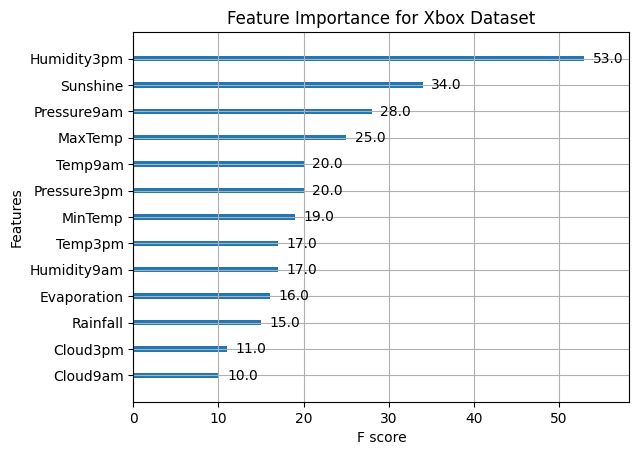

In [ ]:
from xgboost import XGBClassifier,plot_importance
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,precision_score,recall_score,f1_score

xgb_clr=XGBClassifier()

# Define the parameter grid for GridSearchCV
param_grid_xgb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
}
# Perform GridSearchCV
grid_search_xgb = GridSearchCV(xgb_clr, param_grid_xgb, cv=3, scoring='accuracy')
grid_search_xgb.fit(x_train, y_train)

# Get the best parameters and the corresponding model
best_params_xgb = grid_search_xgb.best_params_
best_model_xgb = grid_search_xgb.best_estimator_ # Use best_estimator_ to get the best model

# Predict values using the best model
y_train_pred_xgb = best_model_xgb.predict(x_train) # Use best_model_xgb to predict
y_test_pred_xgb = best_model_xgb.predict(x_test) # Use best_model_xgb to predict

# Calculate accuracy scores
train_accuracy_xgb = accuracy_score(y_train, y_train_pred_xgb)
test_accuracy_xgb = accuracy_score(y_test, y_test_pred_xgb)

# Print the results
print("Best Parameters for XGBoost:", best_params_xgb)
print("Train Accuracy for XGBoost:", train_accuracy_xgb)
print("Test Accuracy for XGBoost:", test_accuracy_xgb)
print('Confusion matrix for test data:\n', confusion_matrix(y_test, y_test_pred_xgb))
print('Confusion matrix for train data:\n', confusion_matrix(y_train, y_train_pred_xgb))
print(classification_report(y_test,y_test_pred_xgb))

print("Precision: ",precision_score(y_test,y_test_pred_xgb))
print("Recall: ",recall_score(y_test,y_test_pred_xgb))
print("F1: ",f1_score(y_test,y_test_pred_xgb))

#Plot importance using the best model
plot_importance(best_model_xgb) # Changed xgb_clr to best_model_xgb
plt.title('Feature Importance for Xbox Dataset')
plt.show()

## Model Result


*  **Logistic Regression**
   
Accuracy score (train) : 83.8141%

Accuracy score (test) : 82.7844%

Recall Score (test) : 0.5815217391304348

Precision Score (test) : 0.7379310344827587

F1 Score (test) : 0.6504559270516718

*    **Decision tree**

  Accuracy score (train) : 84.3387%

Accuracy score (test) : 80.6886%

Recall Score (test) :  0.5271739130434783

Precision Score (test) : 0.697841726618705

F1 Score (test) : 0.6006191950464397

*  **Bagging**

Accuracy score (train) : 84.3387%

Accuracy score (test) : 80.6886%

Recall Score (test) :  0.5271739130434783

Precision Score (test) : 0.697841726618705

F1 Score (test) : 0.6006191950464397


*  **Random Forest**


Accuracy score (train) : 88.2352%

Accuracy score (test) : 83.0838%

Recall Score (test) :  0.5271739130434783

Precision Score (test) : 0.7886178861788617

F1 Score (test) : 0.6319218241042345


*  **KNN**


Accuracy score (train) : 88.3851%

Accuracy score (test) : 79.7904%

Recall Score (test) :  0.592391304347826

Precision Score (test) : 0.6449704142011834

F1 Score (test) : 0.6175637393767706


*  **Gradient boosting**


Accuracy score (train) : 84.5260%

Accuracy score (test) : 83.0838%

Recall Score (test) :  0.5108695652173914

Precision Score (test) :  0.8034188034188035

F1 Score (test) : 0.6245847176079734


* **XG BOOST**


Accuracy score (train) : 86.7366%

Accuracy score (test) : 82.7844%

Recall Score (test) :   0.5543478260869565

Precision Score (test) : 0.7555555555555555

F1 Score (test) : 0.6394984326018809


### the best model is Random Forest, with an accuracy of 83.0838% and an F1 score of 0.6319. This model has the highest accuracy and F1 score among all the models.
* If precision is a priority, Logistic Regression and Gradient may be considered, as both models have high precision scores. The choice of the best model depends on your specific goals and requirements.


## model’s performance even further

** GridSearchCV for Tree Regression, Bagging, Gradient Boosting, Random Forest,  XGBoost, Logistic Regression, and K-Nearest Neighbors.

* For Decision tree
Best Parameters: {'max_depth': 4}

* For Bagging
Best Parameters: {'max_depth': 4}

* For Random Forest
Best Parameters: {'max_depth': 7}

* For XG Boost
Best Parameters for XGBoost: {'learning_rate': 0.2, 'max_depth': 3, 'min_child_weight': 5, 'n_estimators': 50}

* gradient Boosting
Best Parameters:{learning_rate=0.01,n_estimators=1000,max_depth=1}

